In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scanpy as sc
import matplotlib.gridspec as gridspec

 

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [4]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata_5k=sc.read_h5ad(PATH)
NICHE_NAME ="niche19"



In [5]:
adata_5k=adata_5k[adata_5k.obs['niche19']!="Nonspecific/folded"]

In [6]:
adata_5k_all = adata_5k


In [7]:
adata_5k = adata_5k[adata_5k.obs["Site_status"].isin(["Lesional","Non-lesional"])]


Site_status
Non-lesional    1509235
Lesional         568310
Name: count, dtype: int64

# psoriasis

In [8]:
adata= adata_5k[adata_5k.obs["disease_overall"]=="Psoriasis"]
adata.obs["Timepoint"].value_counts()

Timepoint
Lesional Baseline        61792
Non-lesional Baseline    42948
Never Lesional           35105
Name: count, dtype: int64

In [9]:
niche_counts = adata.obs[NICHE_NAME].value_counts()
valid_niches = niche_counts[niche_counts > 10].index
adata=adata[adata.obs[NICHE_NAME].isin(valid_niches)]                              


In [10]:
adata.obs["Site_status_binary2"]=adata.obs["Site_status"]

/tmp/ipykernel_3007788/915453300.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["Site_status_binary2"]=adata.obs["Site_status"]


/tmp/ipykernel_3007788/161532383.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


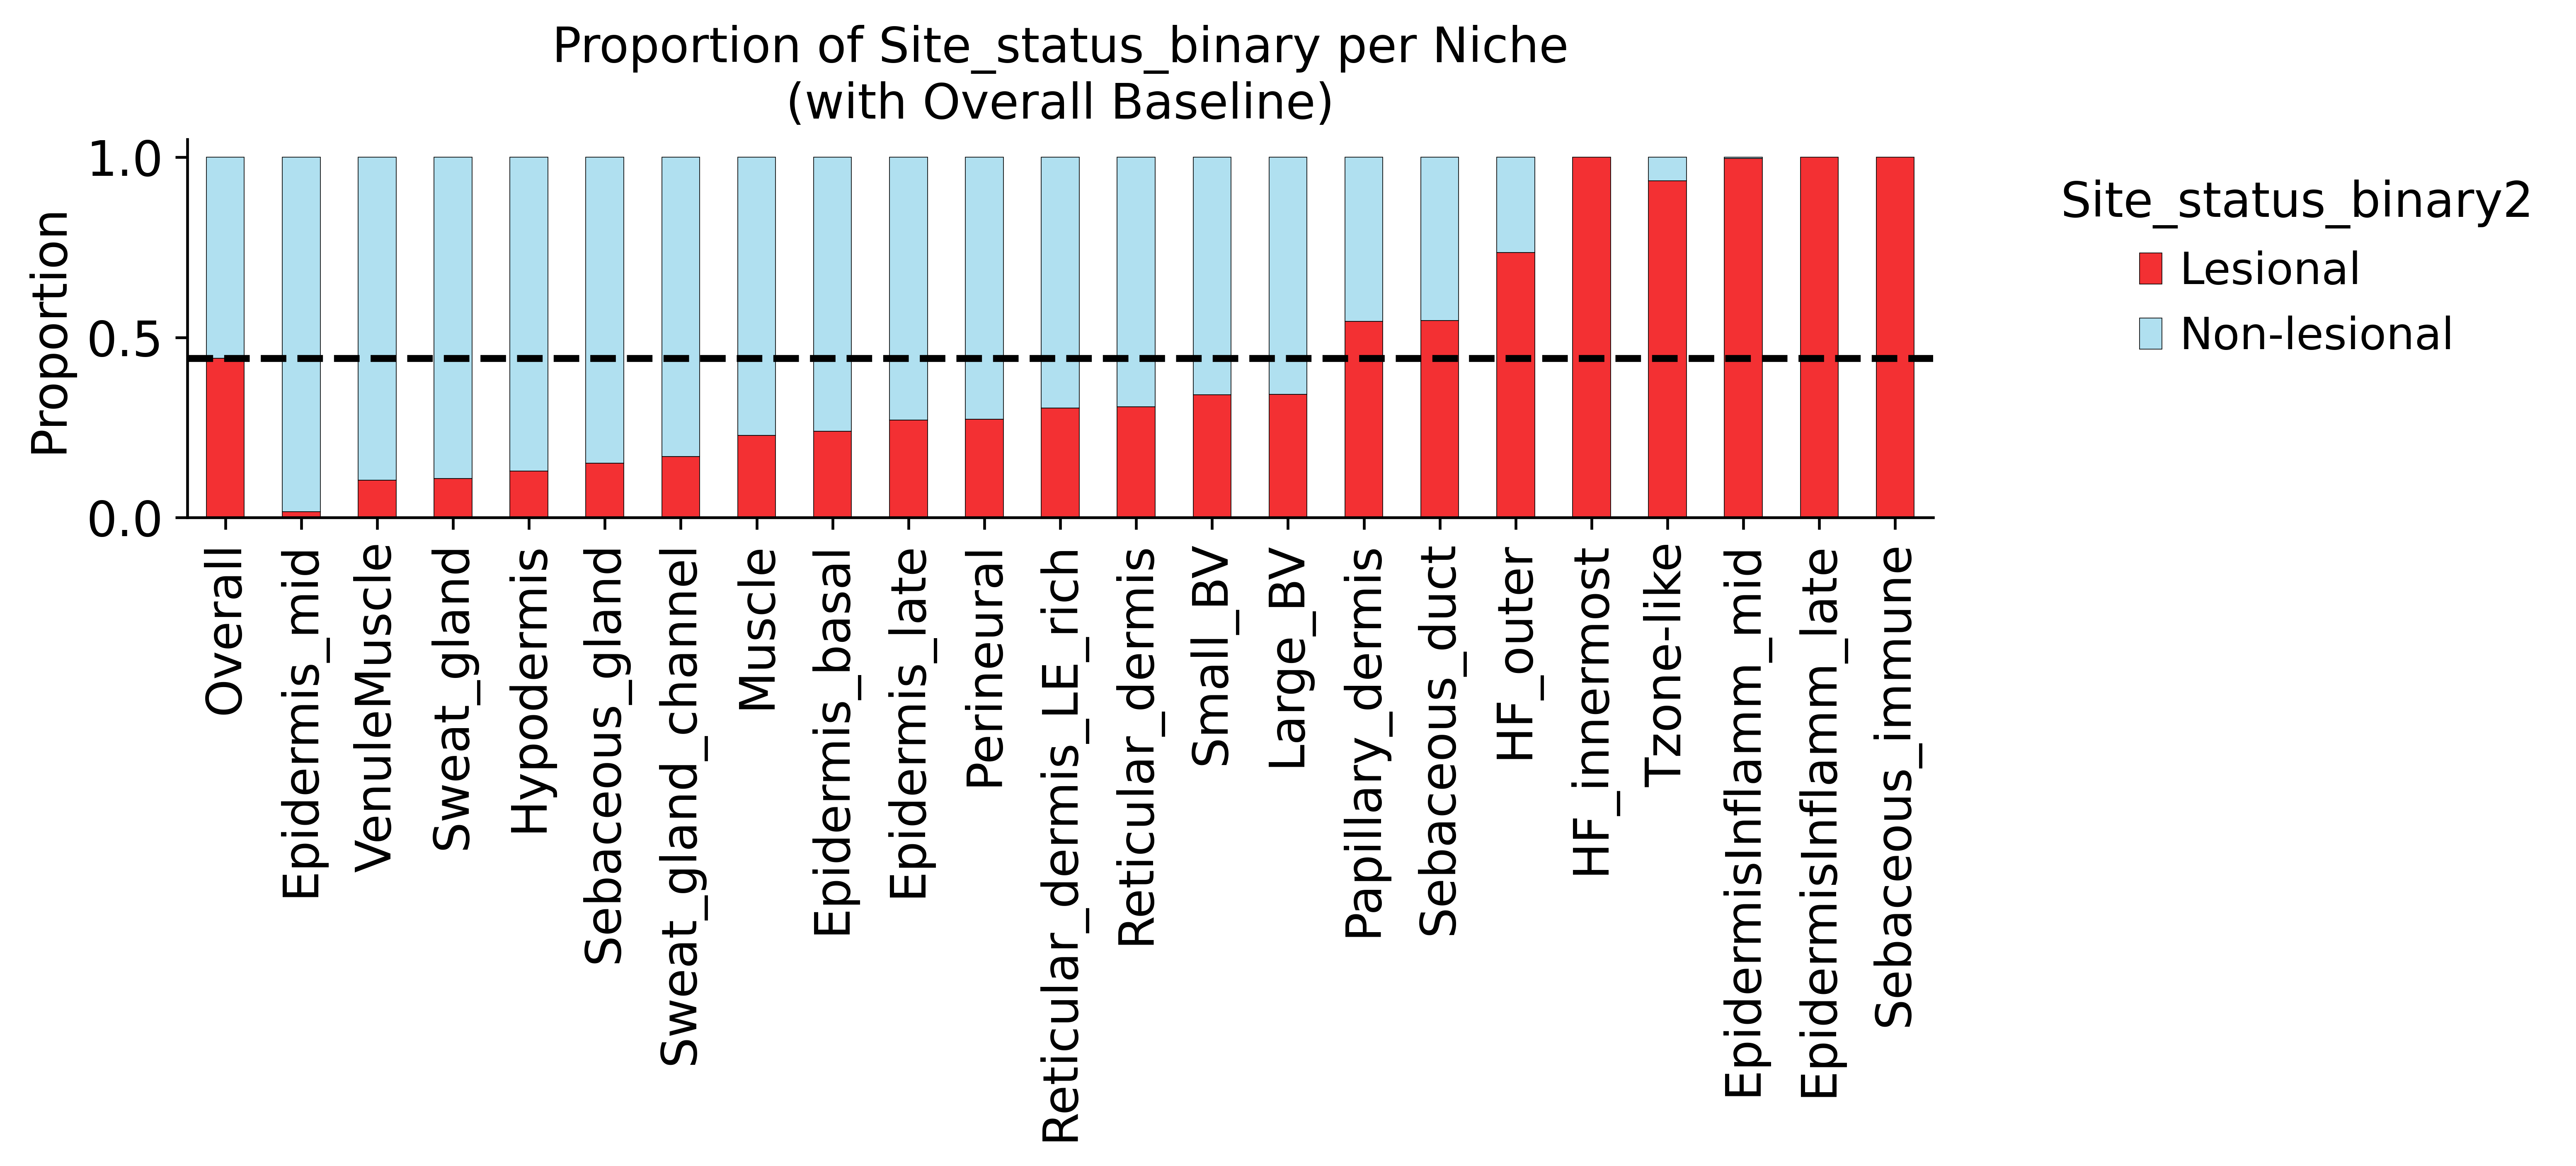

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Contingency table of 'niche12' and 'Site_status_binary2'
contingency = pd.crosstab(adata.obs[NICHE_NAME], adata.obs["Site_status_binary2"])

# Step 2: Convert counts to proportions (row-wise)
proportions = contingency.div(contingency.sum(axis=1), axis=0)

# Step 3: Compute baseline proportions across all niche12 (i.e., global average)
total_counts = adata.obs["Site_status_binary2"].value_counts(normalize=True)
baseline_df = pd.DataFrame([total_counts], index=["Overall"])

# Step 4: Sort niches by proportion of "Lesional"
if "Lesional" not in proportions.columns:
    raise ValueError("Column 'Lesional' not found in Site_status_binary2")

sorted_idx = proportions.sort_values("Lesional", ascending=True).index
special = [  "Tzone-like","EpidermisInflamm_mid","EpidermisInflamm_late", "Plasma_cell_rich", "Sebaceous_immune"]
sorted_idx = [x for x in sorted_idx if x not in special] + [x for x in special if x in sorted_idx]

# Step 5: Concatenate baseline + sorted niches
final_df = pd.concat([baseline_df, proportions.loc[sorted_idx]], axis=0)

# Step 6: Ensure consistent column order
desired_col_order = ["Lesional", "Non-lesional"]
final_df = final_df[desired_col_order]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(9, 2), dpi=300)

final_df.plot(
    kind='bar',
    stacked=True,
    color=["#f33033", "#b0e0f0"],
    edgecolor='black',
    linewidth=0.2,
    ax=ax
)

# Fix xtick alignment manually
ax.set_xticks(range(len(final_df)))
ax.set_xticklabels(final_df.index, rotation=90, ha='center')

# Add dashed horizontal line at the baseline proportion of "Lesional"
lesional_label = "Lesional"
if lesional_label in total_counts:
    baseline_value = total_counts[lesional_label]
    ax.axhline(y=baseline_value, color='black', linestyle='--', linewidth=2)

# Aesthetic clean-up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Proportion')

# Clean legend
legend = ax.legend(title='Site_status_binary2', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(0.0)  # Remove legend box

ax.grid(False)
ax.set_title('Proportion of Site_status_binary per Niche\n(with Overall Baseline)')

plt.tight_layout()
plt.savefig("fig3/3a_psoriasis_ordered.pdf", dpi=300, bbox_inches="tight")

plt.show()

# AD

In [12]:
adata_5k.obs["Site_status_binary2"]=adata_5k.obs["Site_status"]

/tmp/ipykernel_3007788/305611932.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k.obs["Site_status_binary2"]=adata_5k.obs["Site_status"]


In [14]:
adata= adata_5k[adata_5k.obs["disease_overall"]=="AD"]
adata = adata[(adata.obs["Site_status_binary2"]=="Lesional")|
                   (adata.obs["Site_status_binary2"]=="Non-lesional")#|
                  #  (adata_5k.obs["Timepoint"]=="Never Lesional")
                   ]
adata.shape

(457601, 4993)

In [15]:
niche_counts = adata.obs[NICHE_NAME].value_counts()
valid_niches = niche_counts[niche_counts >= 10].index
adata=adata[adata.obs[NICHE_NAME].isin(valid_niches)]                              
adata.obs[NICHE_NAME].value_counts()

niche19
Small_BV                    94294
Epidermis_basal             59727
Papillary_dermis            56533
Epidermis_mid               51739
Epidermis_late              47631
Reticular_dermis            25356
Tzone-like                  20072
Sweat_gland_channel         12952
Sweat_gland                 12687
Muscle                      11153
EpidermisInflamm_mid         9458
Sebaceous_duct               8918
Reticular_dermis_LE_rich     8822
Large_BV                     8408
Perineural                   6225
HF_outer                     5521
Hypodermis                   5155
Sebaceous_gland              4461
Epidermis_basal_cycling      4203
Sebaceous_immune             2183
Epidermis_APChi               548
HF_inner                      475
VenuleMuscle                  462
EpidermisInflamm_late         446
Plasma_cell_rich              168
Name: count, dtype: int64

/tmp/ipykernel_3007788/2151385228.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


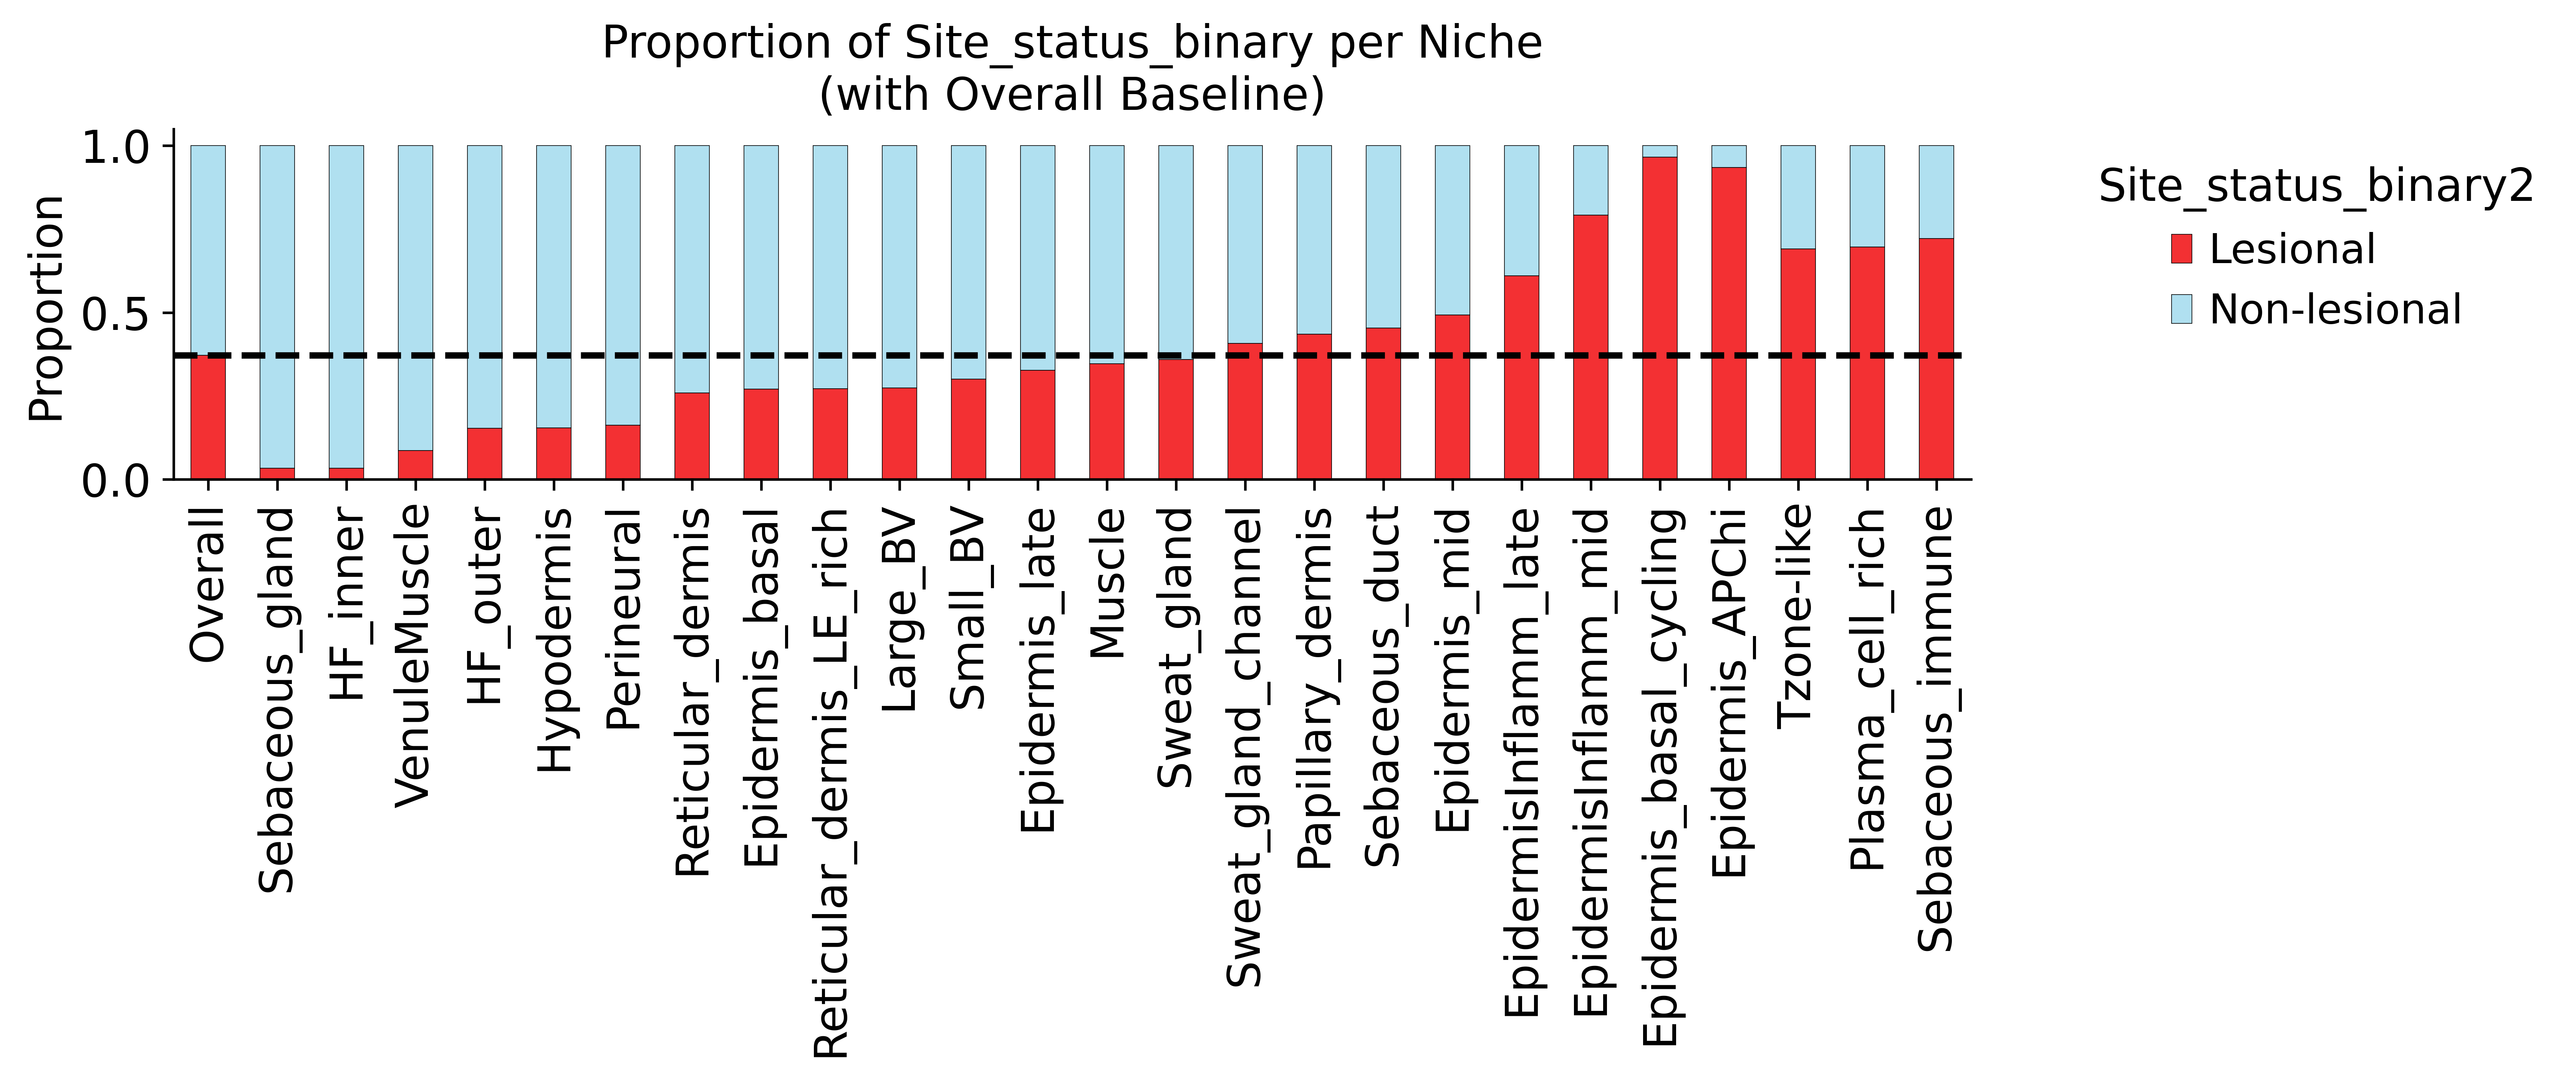

In [16]:
contingency = pd.crosstab(adata.obs[NICHE_NAME], adata.obs["Site_status_binary2"])
proportions = contingency.div(contingency.sum(axis=1), axis=0)
total_counts = adata.obs["Site_status_binary2"].value_counts(normalize=True)
baseline_df = pd.DataFrame([total_counts], index=["Overall"])

# Step 4: Sort niches by proportion of "Lesional"
if "Lesional" not in proportions.columns:
    raise ValueError("Column 'Lesional' not found in Site_status_binary2")

sorted_idx = proportions.sort_values("Lesional", ascending=True).index
#special = ["Plasma_cell_rich", "Sebaceous_immune"]
special = ["Epidermis_APChi", "Tzone-like", "Plasma_cell_rich", "Sebaceous_immune"]
sorted_idx = [x for x in sorted_idx if x not in special] + [x for x in special if x in sorted_idx]


# Step 5: Concatenate baseline + sorted niches
final_df = pd.concat([baseline_df, proportions.loc[sorted_idx]], axis=0)

# Step 6: Ensure consistent column order
desired_col_order = ["Lesional", "Non-lesional"]
final_df = final_df[desired_col_order]

# Step 7: Plotting
fig, ax = plt.subplots(figsize=(10, 2), dpi=300)

final_df.plot(
    kind='bar',
    stacked=True,
    color=["#f33033", "#b0e0f0"],
    edgecolor='black',
    linewidth=0.2,
    ax=ax
)

# Fix xtick alignment manually
ax.set_xticks(range(len(final_df)))
ax.set_xticklabels(final_df.index, rotation=90, ha='center')

# Add dashed horizontal line at the baseline proportion of "Lesional"
lesional_label = "Lesional"
if lesional_label in total_counts:
    baseline_value = total_counts[lesional_label]
    ax.axhline(y=baseline_value, color='black', linestyle='--', linewidth=2)

# Aesthetic clean-up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Proportion')

# Clean legend
legend = ax.legend(title='Site_status_binary2', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(0.0)  # Remove legend box

ax.grid(False)
ax.set_title('Proportion of Site_status_binary per Niche\n(with Overall Baseline)')

plt.tight_layout()
plt.savefig('fig3/3a_ad.pdf', dpi=300, bbox_inches="tight")

plt.show()

# week 12

In [ ]:
adata_5k = adata_5k_all[adata_5k_all.obs["Site_status"].isin(["Lesional","Non-lesional", "Week 12"])]
adata_5k=adata_5k[adata_5k.obs["Site_status"]!="Lesional"]


In [ ]:
sc.settings.figdir = "../fig2/fig2"


In [ ]:
for x in ["AD"]:
    adata_5k_i=adata_5k[adata_5k.obs["disease_overall"]==x]
    # Step 1: Contingency table of 'niche12' and 'Site_status_binary2'
    contingency = pd.crosstab(adata_5k_i.obs[NICHE_NAME], adata_5k_i.obs["Site_status"])

    # Step 2: Convert counts to proportions (row-wise)
    proportions = contingency.div(contingency.sum(axis=1), axis=0)

    # Step 3: Compute baseline proportions across all niche12 (i.e., global average)
    total_counts = adata_5k_i.obs["Site_status"].value_counts(normalize=True)
    total_counts
    
    
    
    baseline_df = pd.DataFrame([total_counts], index=["Overall"])

# # Step 4: Sort niches by proportion of "Lesional"
# if "Lesional" not in proportions.columns:
#     raise ValueError("Column 'Lesional' not found in Site_status_binary2")

    sorted_idx = proportions.sort_values("Week 12", ascending=True).index

    # Step 5: Concatenate baseline + sorted niches
    final_df = pd.concat([baseline_df, proportions.loc[sorted_idx]], axis=0)

    # Step 6: Ensure consistent column order
    desired_col_order = ["Week 12", "Non-lesional"]
    final_df = final_df[desired_col_order]

    # Step 7: Plotting
    fig, ax = plt.subplots(figsize=(10, 2), dpi=300)

    final_df.plot(
        kind='bar',
        stacked=True,
        color=["#FFF59D", "#b0e0f0"],
        edgecolor='black',
        linewidth=0.2,
        ax=ax
    )

    # Fix xtick alignment manually
    ax.set_xticks(range(len(final_df)))
    ax.set_xticklabels(final_df.index, rotation=90, ha='center')

    # Add dashed horizontal line at the baseline proportion of "Lesional"
    lesional_label = "Lesional"
    if lesional_label in total_counts:
        baseline_value = total_counts[lesional_label]
        ax.axhline(y=baseline_value, color='black', linestyle='--', linewidth=2)

    # Aesthetic clean-up
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    
    # Add dashed horizontal line at the baseline proportion of "Lesional"
    lesional_label = "Week 12"
    if lesional_label in total_counts:
        baseline_value = total_counts[lesional_label]
        ax.axhline(y=baseline_value, color='black', linestyle='--', linewidth=2)

    # Clean legend
    legend = ax.legend(title='Site_status_binary2', bbox_to_anchor=(1.05, 1), loc='upper left')
    legend.get_frame().set_linewidth(0.0)  # Remove legend box

    ax.grid(False)
    ax.set_title('')

    plt.tight_layout()
    plt.savefig("fig3/4a.pdf", dpi=300, bbox_inches="tight")

    plt.show()